In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("charttwo.xlsx")
df

,Hospital,PGY 1,PGY 2,PGY 3,PGY 4,PGY 5,PGY 6,PGY 7
0,Health and Hospitals (OLR proposed pattern),"$76,984.83","$80,171.28","$86,539.52","$89,539.71","$92,161.70","$94,597.44","$99,466.59"
1,Average,"$82,572","$87,918","$94,414","$97,830","$101,391","$104,725",NaN


In [5]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [6]:
!pip install rpy2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
%%R

# Ensure the readxl library is available
library(readxl)

# Read data
df <- read_xlsx('charttwo.xlsx')
print(df)


# A tibble: 2 × 8
  Hospital               `PGY 1` `PGY 2` `PGY 3` `PGY 4` `PGY 5` `PGY 6` `PGY 7`
  <chr>                  <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>  
1 Health and Hospitals … $76,98… $80,17… $86,53… $89,53… $92,16… $94,59… $99,46…
2 Average                $82,57… $87,91… $94,41… $97,83… $101,3… $104,7… <NA>   


Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.
Run `rlang::last_trace()` to see where the error occurred.


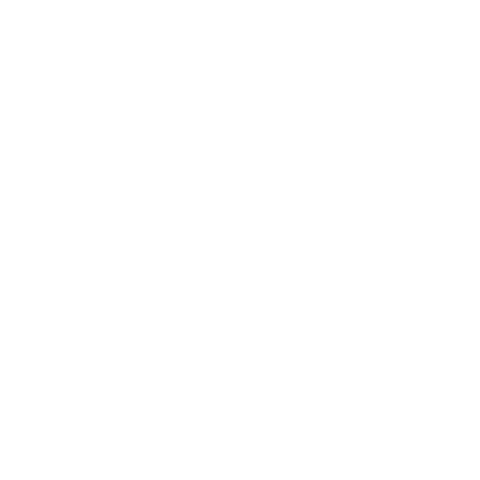

RRuntimeError: Error in geom_histogram() : 
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.


In [8]:
%%R

# Plot
ggplot(df) + geom_histogram()

In [ ]:
!pip install plotnine



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme, element_text, geom_point

# Load the Excel file
#excel_path = '/path/to/your/charttwo.xlsx'  # Adjust this path as needed
#df = pd.read_excel(excel_path)

# Convert the DataFrame from wide to long format
df_long = pd.melt(df, id_vars=['Hospital'], var_name='PGY Level', value_name='Salary')
df_long['Salary'] = df_long['Salary'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
# Convert the DataFrame from wide to long format
df_long = pd.melt(df, id_vars=['Hospital'], var_name='PGY Level', value_name='Salary')
df_long['Salary'] = df_long['Salary'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
#save the long format dataset as csv
df_long.to_csv('charttwo_long.csv', index=False)

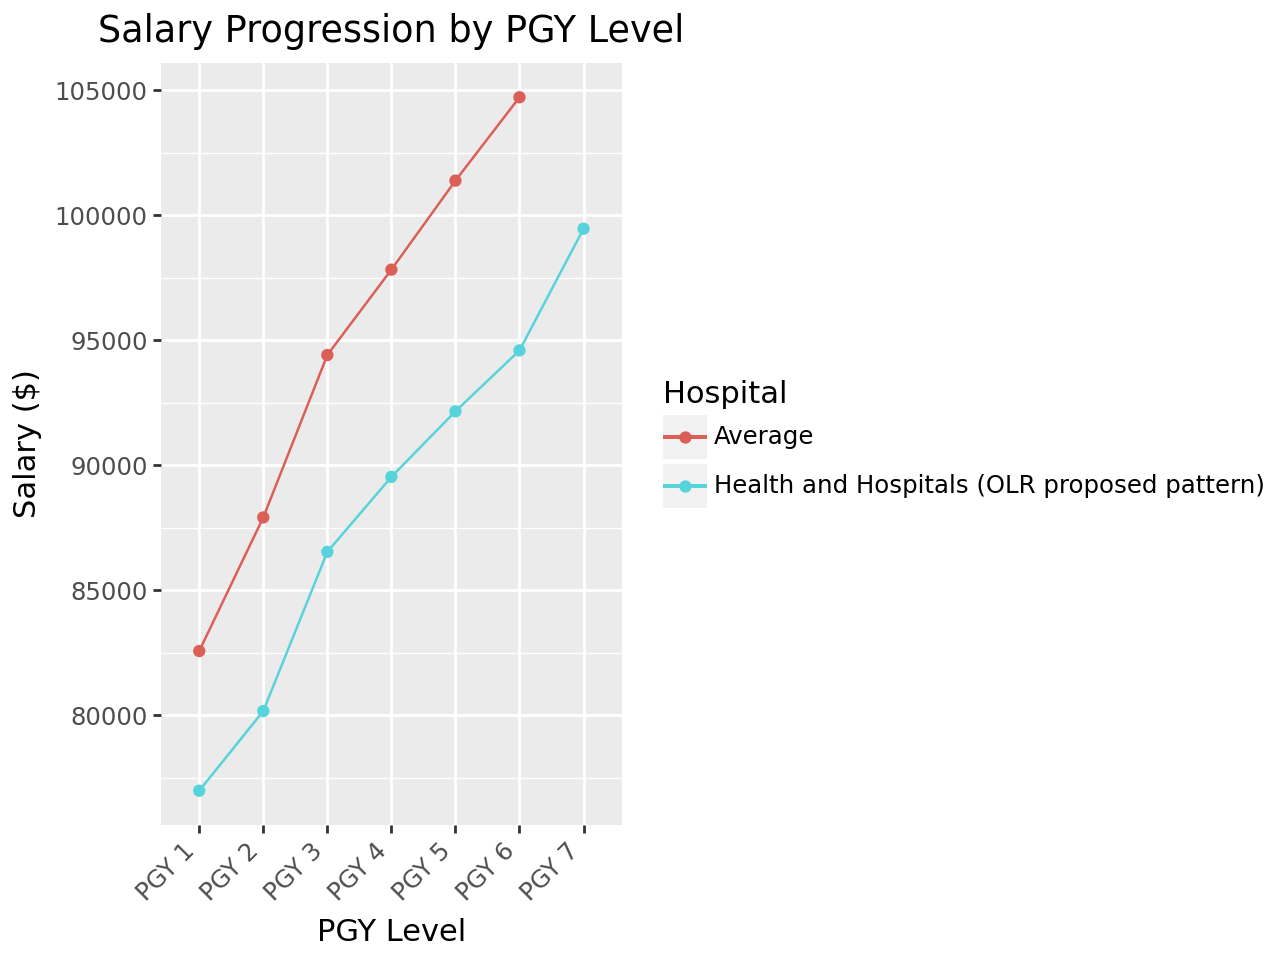

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme, element_text, geom_point

# Load the Excel file
#excel_path = '/path/to/your/charttwo.xlsx'  # Adjust this path as needed
#df = pd.read_excel(excel_path)

# Convert the DataFrame from wide to long format
df_long = pd.melt(df, id_vars=['Hospital'], var_name='PGY Level', value_name='Salary')
df_long['Salary'] = df_long['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Plotting the line chart
plot = (
    ggplot(df_long, aes(x='PGY Level', y='Salary', color='Hospital', group='Hospital'))
    + geom_line()
    + geom_point()
    + labs(title='Salary Progression by PGY Level', x='PGY Level', y='Salary ($)')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

print(plot)
